Predicting Survival in the Titanic Data Set 

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [3]:
titanic = pd.read_csv(url) # reading data

In [4]:
titanic.head() # looking at first five rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace = True) # dropping unncessary columns

In [10]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [11]:
# checking for null values

titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [12]:
# filling null values of 'Age' column with its mean value

titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

In [13]:
titanic.isna().any() # again checking for null values

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [14]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [15]:
# Encoding Sex column

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

titanic['Sex'] = labelencoder.fit_transform(titanic['Sex'])

In [16]:
titanic['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

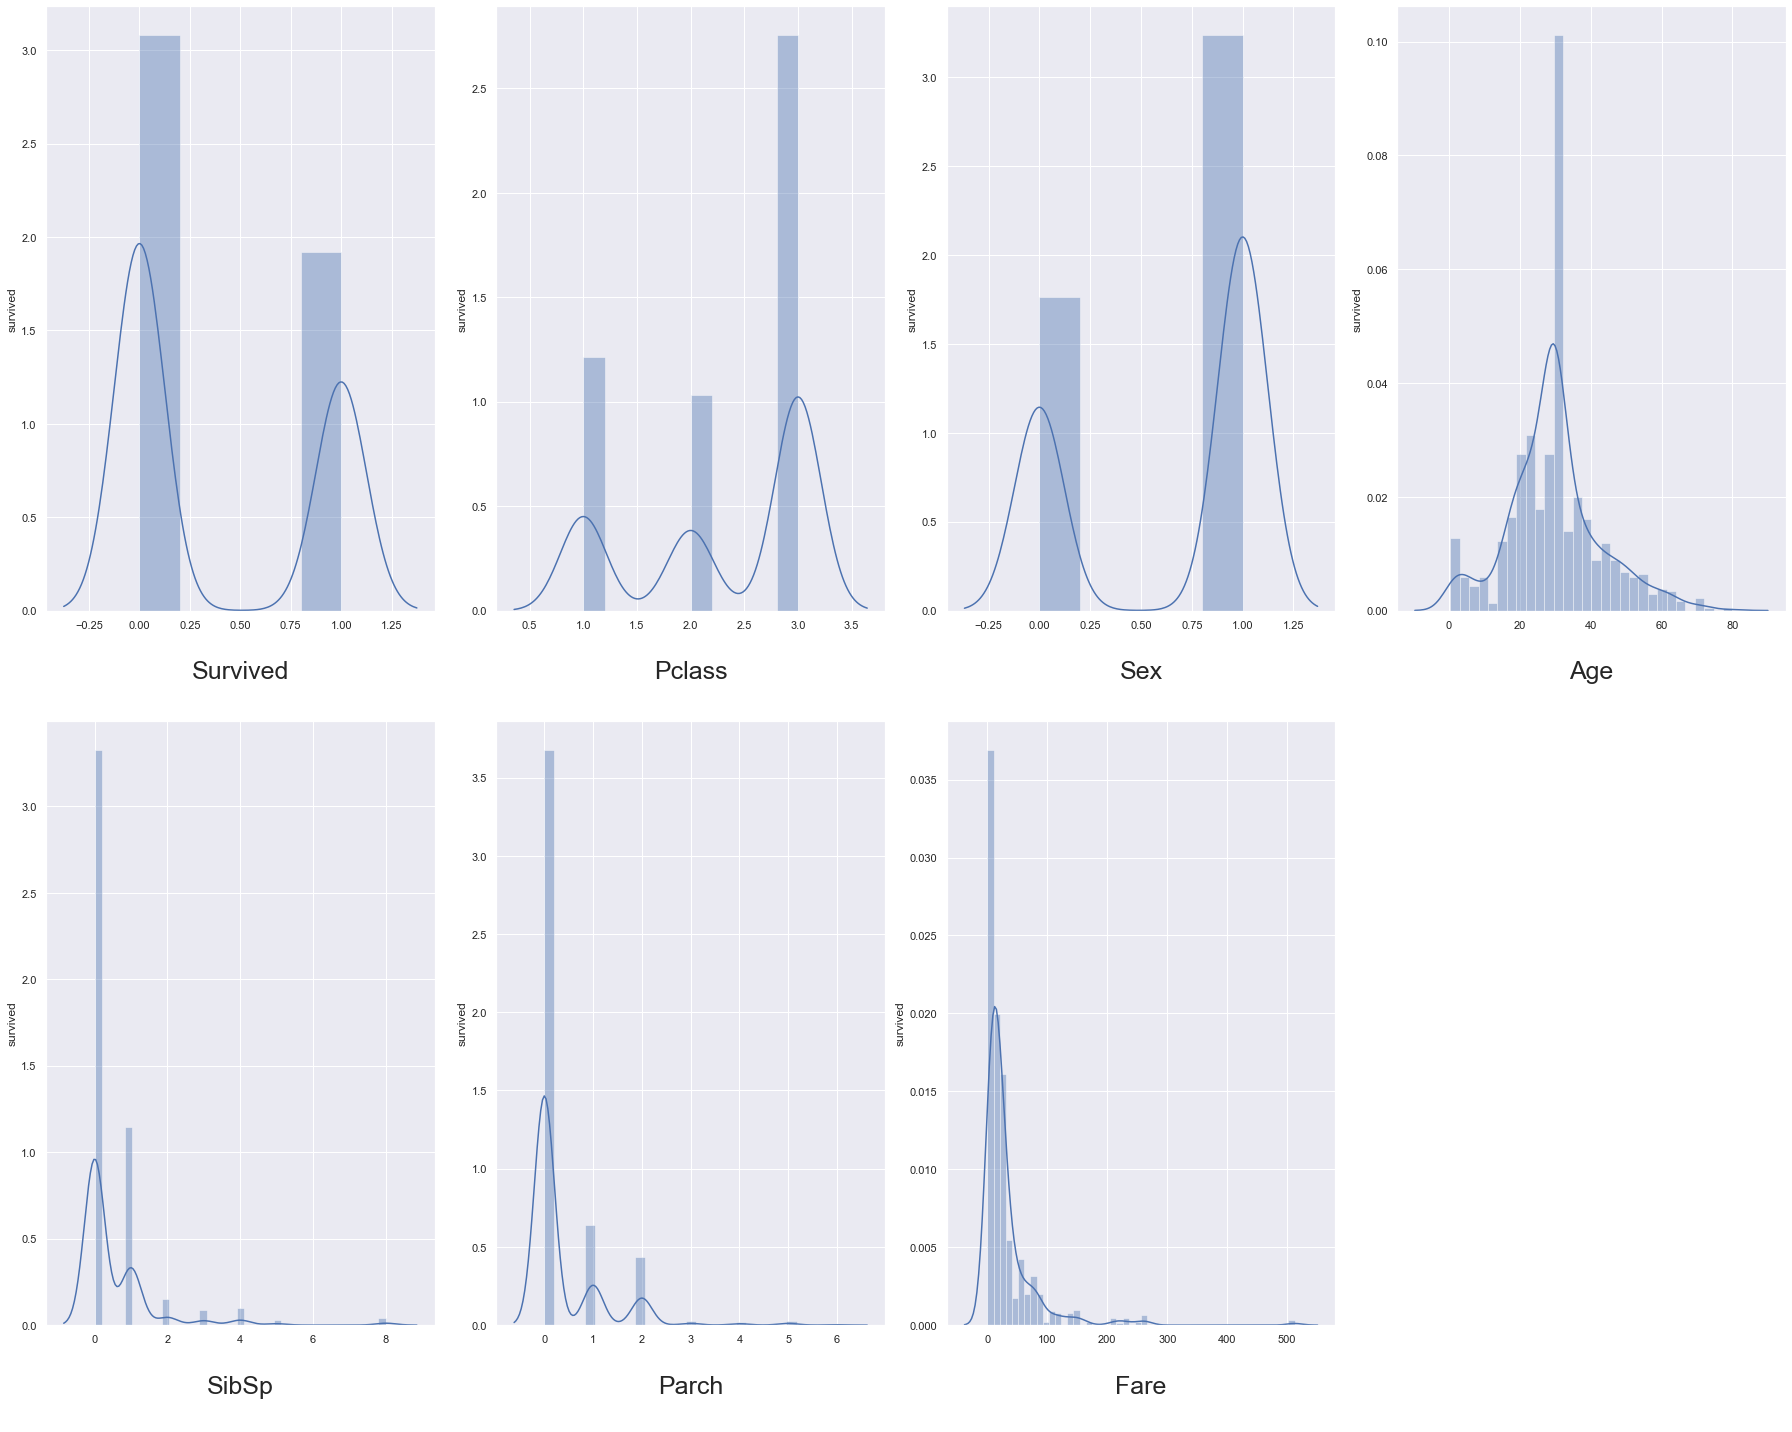

In [17]:
# let's see how data is distributed for every column

plt.figure(figsize = (25, 20))
plotnumber = 1

for column in titanic:
    if plotnumber <= 7:
        ax = plt.subplot(2, 4, plotnumber)
        sns.distplot(titanic[column])
        plt.xlabel('\n' + column + '\n', fontsize = 25)
        plt.ylabel('survived')
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

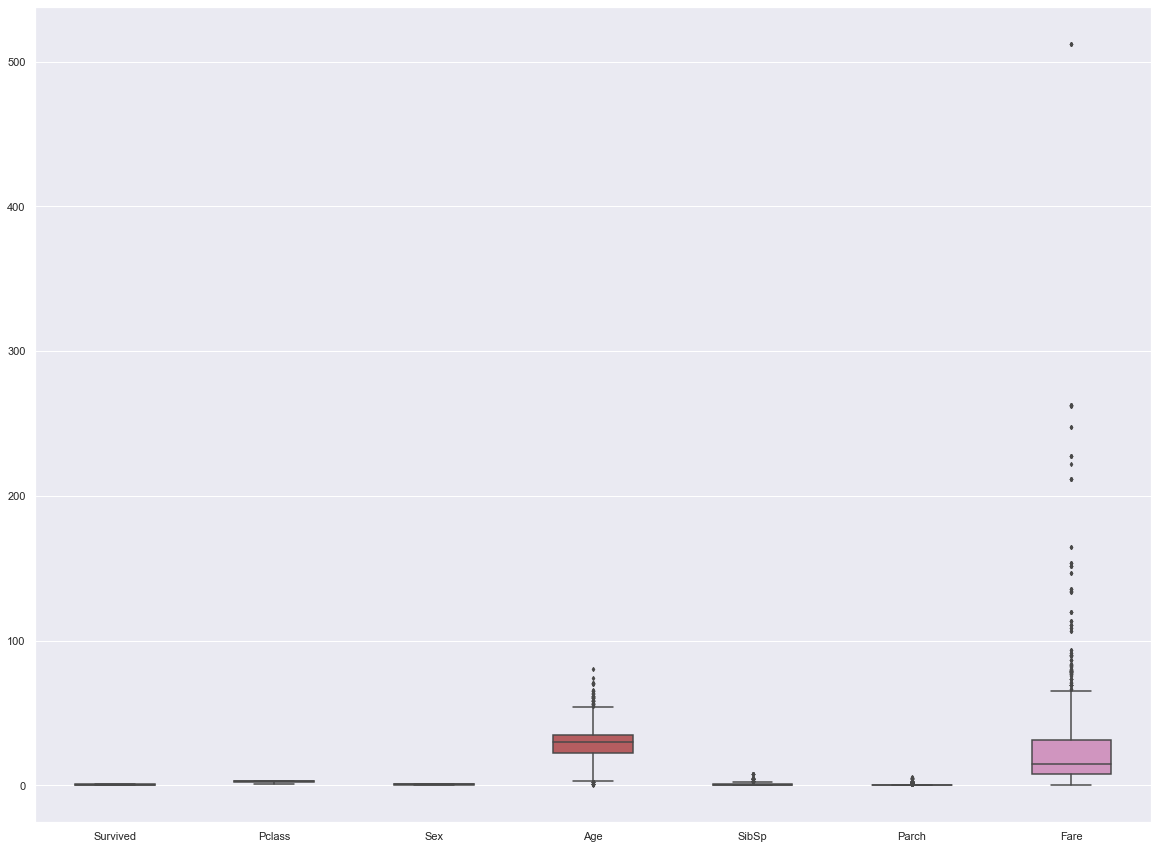

In [18]:
# checking for outliers

fig, ax = plt.subplots(figsize = (20, 15))
sns.boxplot(data = titanic, ax = ax, width = 0.5, fliersize = 3)
plt.show()

In [19]:
q = titanic['Fare'].quantile(0.95)
# removing top 5% data from Fare column
titanic = titanic[titanic['Fare'] < q]

q = titanic['Age'].quantile(0.98)
# removing top 2% data from Age column
titanic = titanic[titanic['Age'] < q]

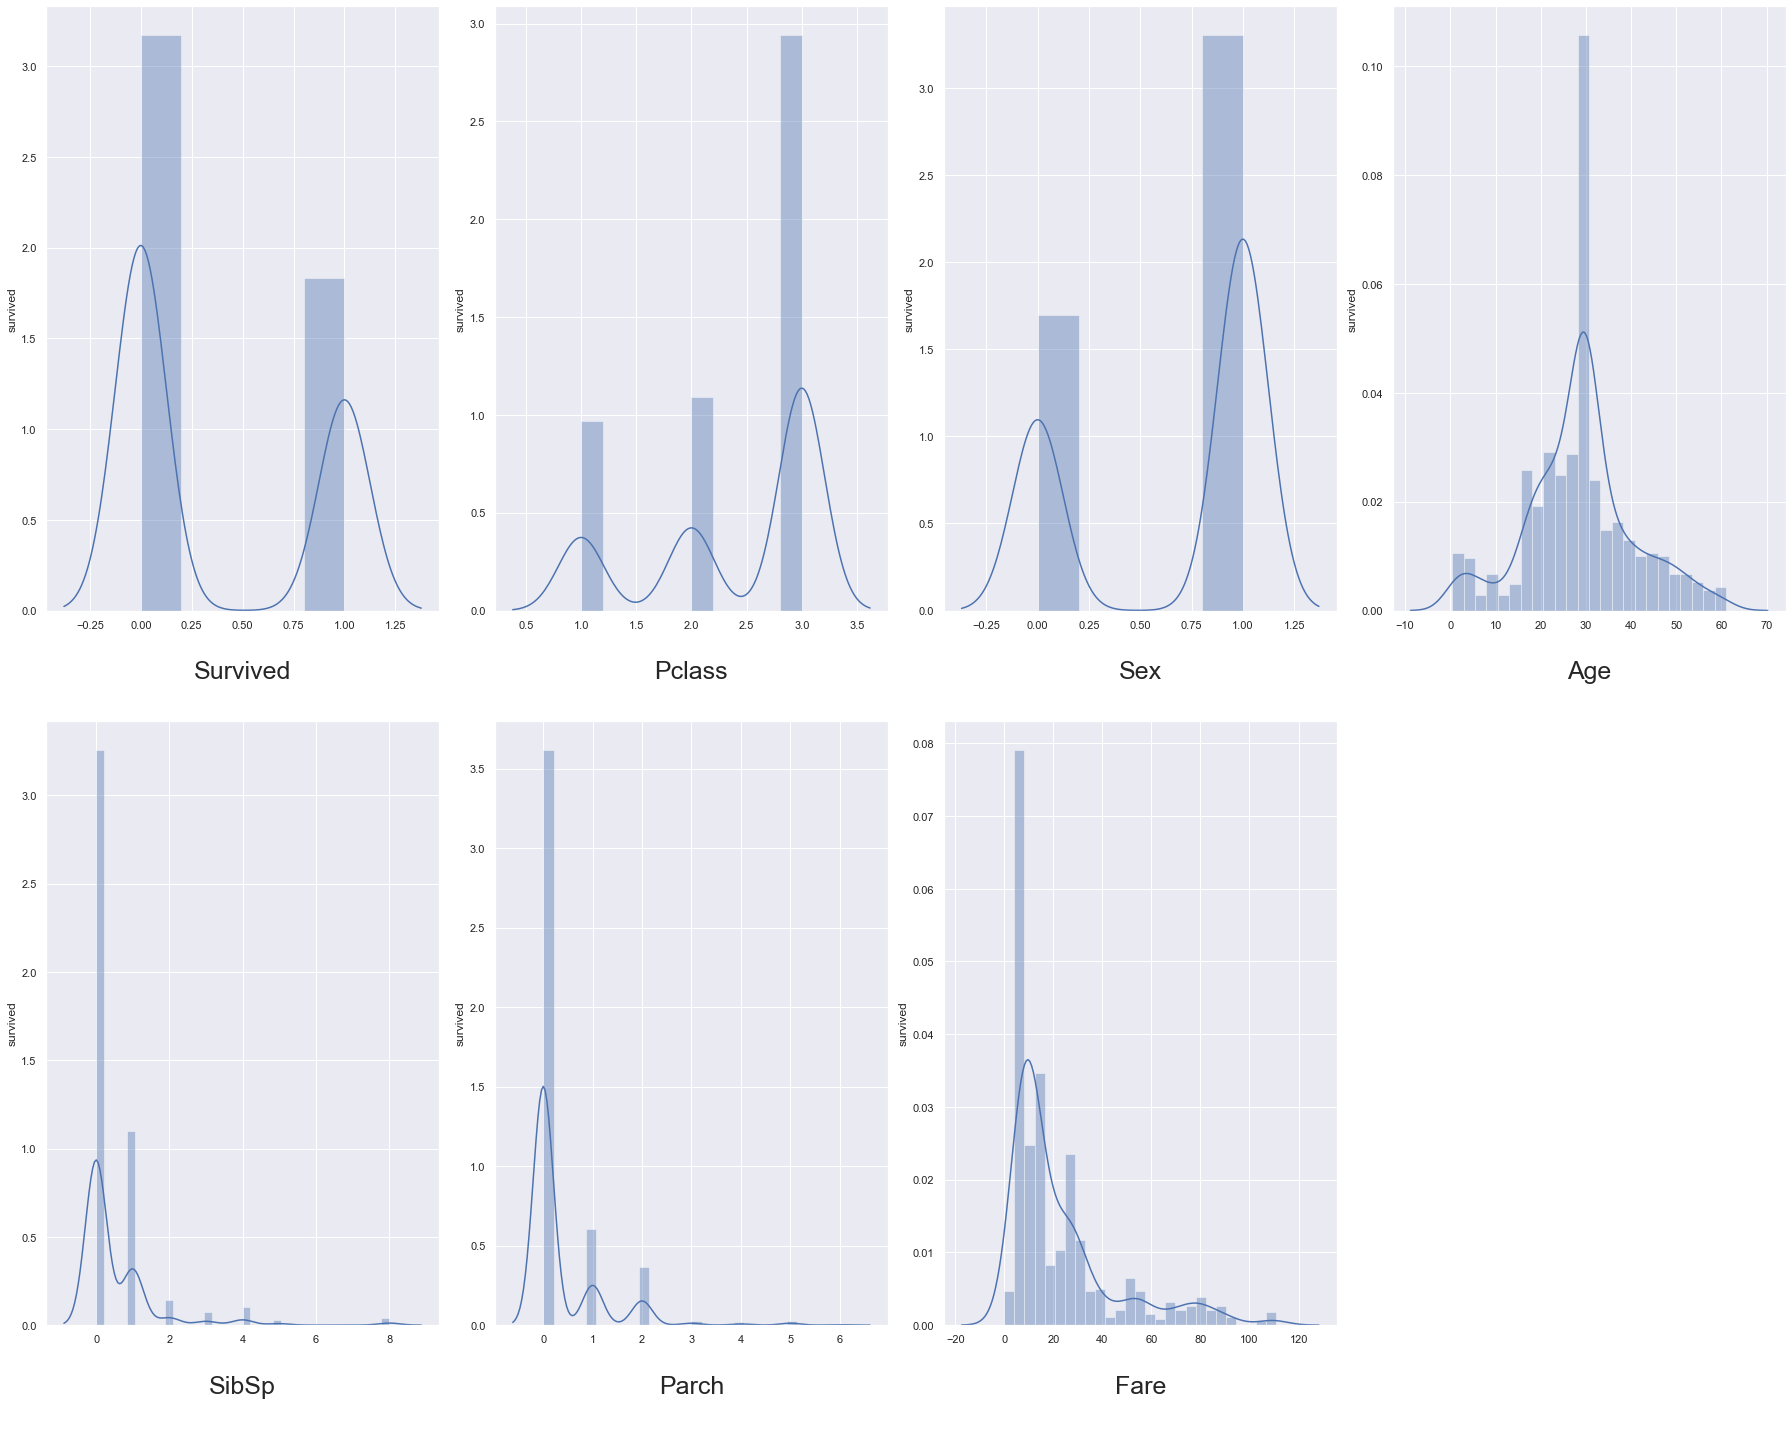

In [20]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for column in titanic:
    if plotnumber <= 7:
        ax = plt.subplot(2, 4, plotnumber)
        sns.distplot(titanic[column])
        plt.xlabel('\n' + column + '\n', fontsize = 25)
        plt.ylabel('survived')
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Now our data looks much better.

In [21]:
# creating features and label

X = titanic.drop(columns = 'Survived')
y = titanic['Survived']

In [22]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled

array([[ 0.76509774,  0.71673646, -0.57357732,  0.4240719 , -0.45136222,
        -0.70927854],
       [-1.76384809, -1.39521296,  0.78148018,  0.4240719 , -0.45136222,
         2.1663682 ],
       [ 0.76509774, -1.39521296, -0.23481295, -0.46712489, -0.45136222,
        -0.67896523],
       ...,
       [ 0.76509774, -1.39521296,  0.07846937,  0.4240719 ,  2.08238636,
         0.018241  ],
       [-1.76384809,  0.71673646, -0.23481295, -0.46712489, -0.45136222,
         0.31239242],
       [ 0.76509774,  0.71673646,  0.27333362, -0.46712489, -0.45136222,
        -0.68682424]])

In [24]:
# checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

In [25]:
vif

,vif,features
0,2.303615,Pclass
1,1.102070,Sex
2,1.193065,Age
3,1.525466,SibSp
4,1.332160,Parch
5,2.466705,Fare


We can see that vif is less than 5 for every column so there is no multicollinearity.

In [26]:
# splitting data into training and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)

In [27]:
# first visualize the tree on the data without any preprocessing 

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
feature_names = list(X.columns)
class_names = list(y_train.unique())

In [29]:
feature_names

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [30]:
class_names

[0, 1]

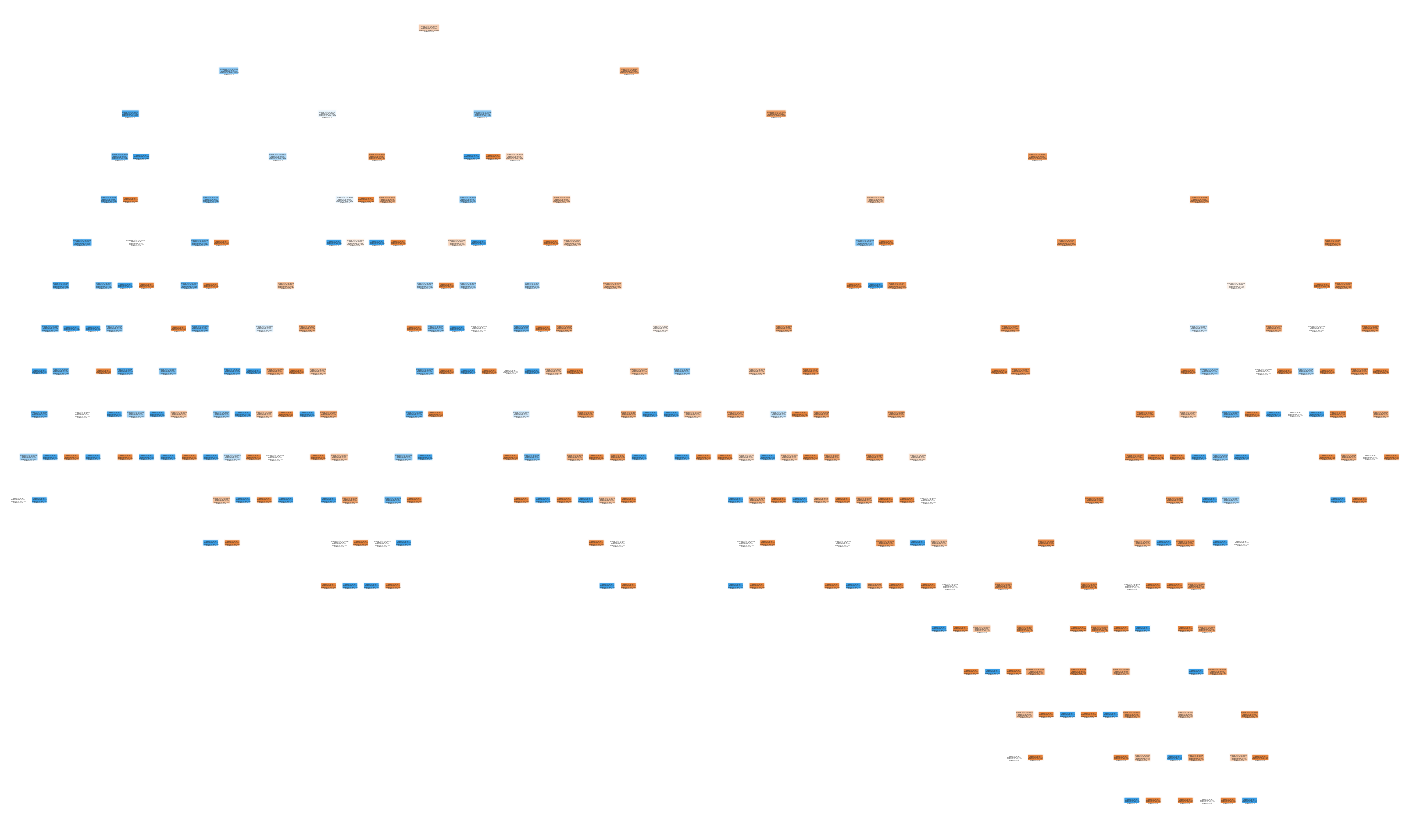

In [31]:
# visualizing tree

from sklearn import tree

fn = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
cn = ['0', '1']

fig = plt.figure(figsize = (25, 15))
tr = tree.plot_tree(clf, feature_names=fn, class_names=cn, filled = True, rounded = True)
fig.savefig('Decision Tree')

In [32]:
clf.score(X_train, y_train)

0.9855072463768116

In [33]:
y_pred = clf.predict(X_test)

In [34]:
# accuracy of classification tree
clf.score(X_test, y_test)

0.782608695652174

In [35]:
# hyper parameter tuning

grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,42,1),
    'min_samples_leaf' : range(1,20,1),
    'min_samples_split': range(2,20,1),
    'splitter' : ['best', 'random']
}

In [36]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = clf, param_grid = grid_params, cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 42),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [37]:
# best paramaters

grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 11,
 'splitter': 'best'}

In [38]:
# best score

grid_search.best_score_

0.8309548387096773

In [54]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 1, min_samples_split = 11,
                             splitter = 'best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=11)

In [55]:
clf.score(X_train, y_train)

0.8969404186795491

In [56]:
clf.score(X_test, y_test)

0.8502415458937198

In [57]:
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [7, 8, 9, 10],
    'min_samples_leaf' : [1, 2, 3, 4, 5],
    'min_samples_split': [10, 11, 12, 13, 14, 15],
    'splitter' : ['best', 'random']
}

In [58]:
grid_search = GridSearchCV(estimator = clf, param_grid = grid_params, cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                              min_samples_split=11),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [10, 11, 12, 13, 14, 15],
                         'splitter': ['best', 'random']})

In [59]:
# best paramaters

grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'splitter': 'best'}

In [63]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 1, min_samples_split = 12,
                             splitter = 'best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=12)

In [64]:
clf.score(X_train, y_train)

0.895330112721417

In [65]:
clf.score(X_test, y_test)

0.8502415458937198